**Reading the data from CSV**

In this section, we will load and view the CSV file and its contents.

In [ ]:
import pandas as pd
data=pd.read_csv('/content/heart1.csv')
print(data)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Thalach  Exercise angina  oldpeak  Slope of ST

The data has 14 attributes or features including target which will be age, gender, cholesterol level, exacting, chest pain, old peak, thalach, FBS, slope, thal, etc.

# **Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              270 non-null    int64  
 1   Sex              270 non-null    int64  
 2   Chest pain type  270 non-null    int64  
 3   BP               270 non-null    int64  
 4   Cholesterol      270 non-null    int64  
 5   FBS over 120     270 non-null    int64  
 6   EKG results      270 non-null    int64  
 7   Thalach          270 non-null    int64  
 8   Exercise angina  270 non-null    int64  
 9   oldpeak          270 non-null    float64
 10  Slope of ST      270 non-null    int64  
 11  ca               270 non-null    int64  
 12  Thallium         270 non-null    int64  
 13  target           270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


# Checking if null values are present

In [ ]:
data.isnull().sum()

Age                0
Sex                0
Chest pain type    0
BP                 0
Cholesterol        0
FBS over 120       0
EKG results        0
Thalach            0
Exercise angina    0
oldpeak            0
Slope of ST        0
ca                 0
Thallium           0
target             0
dtype: int64

# **Inference**: From this output, our data does not contain null values and duplicates. So, the data is good which will be further analyzed.

# **Correlation Matrix**
Visulaizing the data features to find the correlation between them which will infer the important features

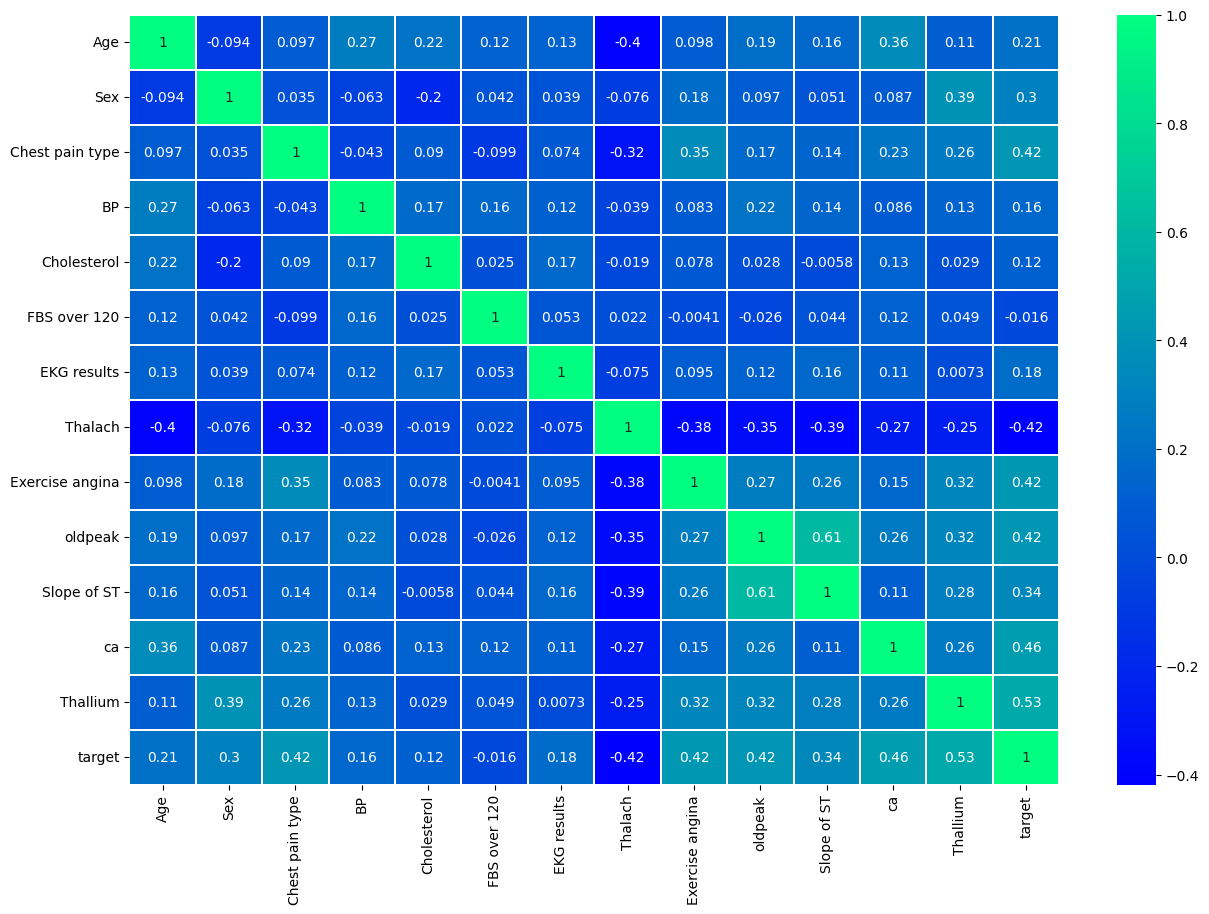

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

**Inference:**

From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

#Understanding the balance of the data

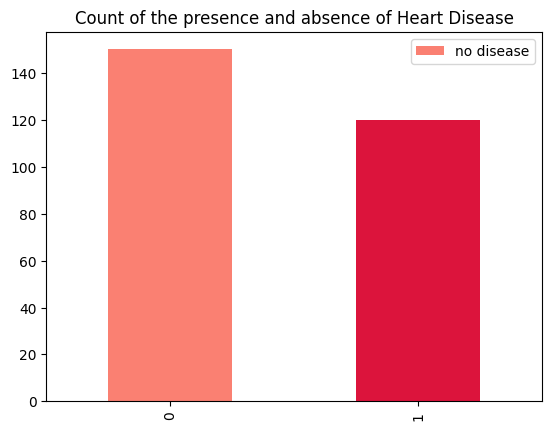

In [ ]:
data['target'].value_counts().plot(kind='bar',color=['salmon','crimson'],title='Count of the presence and absence of Heart Disease')
plt.legend(['no disease','disease'])

**Inference:Count of the absence of heart disease and presence of the heart disease with respect to sex**


# **Let us see the relation between each features distribution with the help of histogram.**

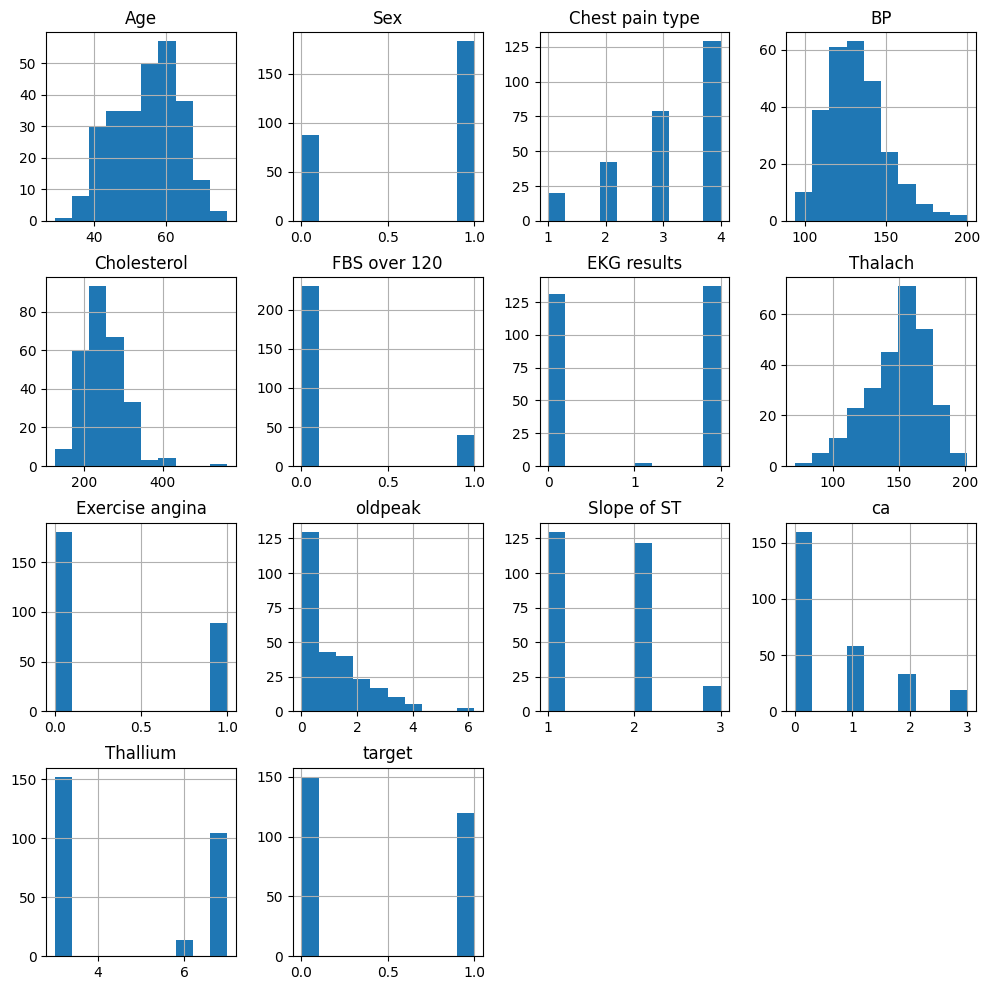

In [ ]:
data.hist(figsize=(12,12))
plt.savefig('feature plot')

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X=np.array(data.iloc[:,:13])
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

# **Algorithm Implementation**

# **1.Logistic Regression**

Testing Accuracy for Logistic Regression: 0.8888888888888888
Testing Sensitivity for Logistic Regression: 0.9090909090909091
Testing Specificity for Logistic Regression: 0.8571428571428571
Testing Precision for Logistic Regression: 0.9090909090909091


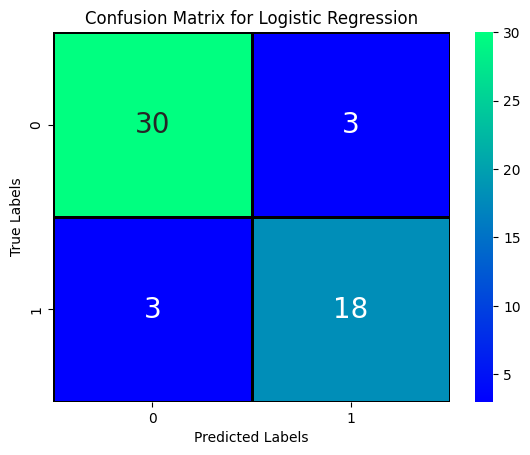

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as lr_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Assuming X and y are your dataset and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model with specified parameters
lr = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                        fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                        max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                        random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False)

# Create a StandardScaler for the correct number of features (2 in this case)
st_x = StandardScaler()

# Fit and transform the training data
X_train_scaled = st_x.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = st_x.transform(X_test)

# Fit the logistic regression model to the scaled training data
model1 = lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
prediction1 = model1.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction1)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='winter', linewidth=2, linecolor='black', annot_kws={"size": 20})

# Extract elements of the confusion matrix
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# Print evaluation metrics
print('Testing Accuracy for Logistic Regression:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Logistic Regression:', (TP / (TP + FN)))
print('Testing Specificity for Logistic Regression:', (TN / (TN + FP)))
print('Testing Precision for Logistic Regression:', (TP / (TP + FP)))

# Show the plot
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.86      0.86      0.86        21

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



**Inference: From the above report, we get the accuracy of the Logistic Regression classifier is about 89%.**

# **2.Decision Tree**

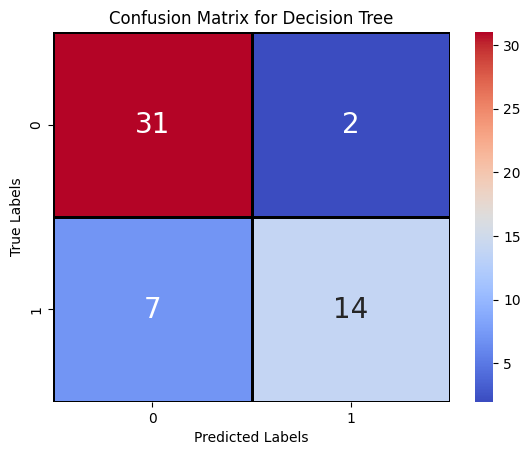

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.88      0.67      0.76        21

    accuracy                           0.83        54
   macro avg       0.85      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54

Testing Accuracy for Decision Tree: 0.8333333333333334
Testing Sensitivity for Decision Tree: 0.8157894736842105
Testing Specificity for Decision Tree: 0.875
Testing Precision for Decision Tree: 0.9393939393939394


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Assuming X_test and y_test are your test set
tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# Cross-validation scores
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='accuracy')

# Fit the model on the entire training set
m = tree_model.fit(X_train, y_train)

# Make predictions on the test set
prediction = m.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, prediction)

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidth=2, linecolor='black', annot_kws={"size": 20})
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print(classification_report(y_test, prediction))

# Extract elements of the confusion matrix
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# Print evaluation metrics
print('Testing Accuracy for Decision Tree:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Decision Tree:', (TP / (TP + FN)))
print('Testing Specificity for Decision Tree:', (TN / (TN + FP)))
print('Testing Precision for Decision Tree:', (TP / (TP + FP)))


**Inference: From the above report, we get the accuracy of the Decision Tree classifier is about 83%.**

# **3. Random Forest Classifier**

88.89
Testing Accuracy for Random Forest: 0.8888888888888888
Testing Sensitivity for Random Forest: 0.8648648648648649
Testing Specificity for Random Forest: 0.9411764705882353
Testing Precision for Random Forest: 0.9696969696969697


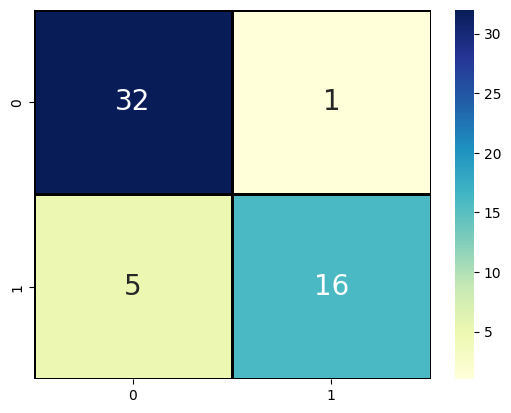

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='YlGnBu',linewidth=2, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

**Let us see the classification report for Random Forest Classifier:**

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



**Inference: From the above report, we can get the accuracy of the Random Forest classifier is about 89%.**

# **4.Support Vector Machine**

Testing Accuracy for SVM: 0.8703703703703703
Testing Sensitivity for Random Forest: 0.8611111111111112
Testing Specificity for Random Forest: 0.8888888888888888
Testing Precision for Random Forest: 0.9393939393939394


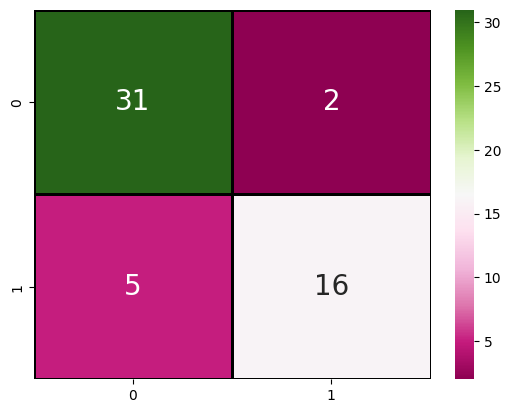

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='PiYG',linewidth=2, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

**Let us see the classification report of SVM:**

In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54



**Inference: From the above report, we get the accuracy of the Support Vector Machine classifier is about 87%.**

**From the results that we got, as four machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and Decision Trees. From the final results, we got Logistic Regression as 78%, Random Forest as 76%, Support Vector Machines as 76%, and Decision Trees as 90%. We can conclude that the Decision Tree algorithm is the best algorithm for our model with the highest accuracy around 92 percent.**

# **K-Nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None,n_jobs=None,n_neighbors=5,p=2,weights='uniform')

#training score
knn.score(X_train,y_train)

#prediction of the test variable
knn_y_preds=knn.predict(X_test)

#testing accuracy
knn.score(X_test,y_test)

0.6481481481481481

**Confusion Matrix**

Testing Accuracy for SVM: 0.8703703703703703
Testing Sensitivity for Random Forest: 0.8611111111111112
Testing Specificity for Random Forest: 0.8888888888888888
Testing Precision for Random Forest: 0.9393939393939394


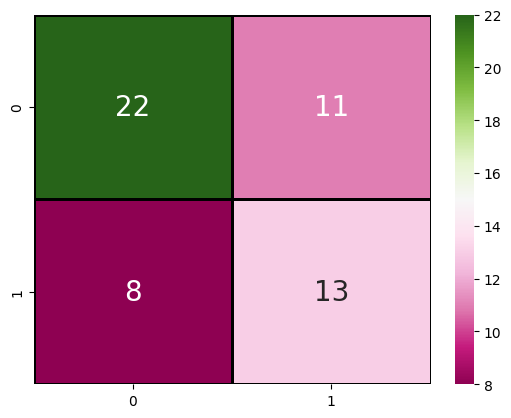

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm5=confusion_matrix(y_test,knn_y_preds)
sns.heatmap(cm5, annot=True,cmap='PiYG',linewidth=2, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

**Classification Report**

In [ ]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        33
           1       0.54      0.62      0.58        21

    accuracy                           0.65        54
   macro avg       0.64      0.64      0.64        54
weighted avg       0.66      0.65      0.65        54



# **Final model Comparison**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr_model
from sklearn.model_selection import cross_val_score
model_scores={'Logistic regression':lr.score(X_test,y_test),
              'KNN':knn.score(X_test,y_test),
              'Random forest':rfc.score(X_test,y_test),
              'SVM':svm.score(X_test,y_test),
              'Decision Tree':tree_model.score(X_test,y_test)}
print(model_scores)

{'Logistic regression': 0.3888888888888889, 'KNN': 0.6481481481481481, 'Random forest': 0.8888888888888888, 'SVM': 0.8703703703703703, 'Decision Tree': 0.8333333333333334}


In [ ]:
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
model_compare

,Logistic regression,KNN,Random forest,SVM,Decision Tree
Accuracy,0.388889,0.648148,0.888889,0.87037,0.833333


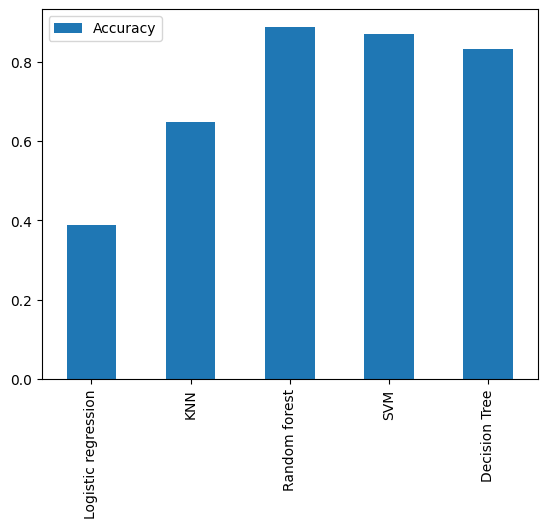

In [ ]:
model_compare.T.plot(kind='bar')
plt.legend(loc='upper left')

# **Final Model Implementation**
Now, we can apply the best working algorithm (i.e., Decision Tree Classifier) into our model and check whether our model will result in the correct output or not with the help of available data.

# CASE 1 – For Heart Disease data

In [ ]:
input=(63,0,4,150,407,0,2,154,0,4,2,3,7)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be have heart disease:(


# CASE 2 – For Normal Data

In [ ]:
input=(71	,0	,2	,160	,302	,0	,0	,162	,0	,0.4	,1	,2	,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)
